In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ml
from scipy.stats import norm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


In [60]:
def to_row(arr):
    return arr.reshape(1, -1)

def nb(nb_constr, points_training, points_test, labels_training, labels_test):
    naive_bayes = nb_constr(points_training, labels_training)
    print(f'Accuracy: {np.mean(naive_bayes.predict(points_test) == labels_test)}')
    plt.plot(*roc_curve(labels_test, [el[0] for el in naive_bayes.prob(points_test)])[0:1])
    plt.show()



In [2]:
spam_dataset = pd.read_csv("../datasets/spam.csv")
spam_labels = [val for val in spam_dataset['label'].values]
spam_points = spam_dataset.drop(['label'], axis=1).values

spam_points_training, spam_points_test, spam_labels_training, spam_labels_test = ml.train_test_split(spam_points, spam_labels, train_size=0.8)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:

class GNB:
    def __init__(self, data, labels):
        self.labels_variants = set(labels)
        self.mean = np.array([np.mean(data[labels == label], axis=0) for label in self.labels_variants])
        self.variance = np.array([np.var(data[labels == label], axis=0) for label in self.labels_variants])
        
    def _label_prob(self, label_index, point):
        pdf = norm(self.mean[label_index], self.variance[label_index]).pdf(point)
        return np.sum(np.log(pdf[~np.isnan(pdf)] + 0.0000001))
        
    def _prob_point(self, point):
        probabilities = np.ones(len(self.labels_variants))
        exp_sum = 0
        for (index, label) in enumerate(self.labels_variants):
            label_prob = self._label_prob(index, point)
            probabilities[index] = label_prob
            exp_sum += np.exp(probabilities[index])
        return np.exp(probabilities) / exp_sum
        
    def prob(self, points):
        return np.array([self._prob_point(point) for point in points])
        
    def predict(self, points):
        return np.argmax(self.prob(points), axis=1)


Accuracy: 0.8610206297502715


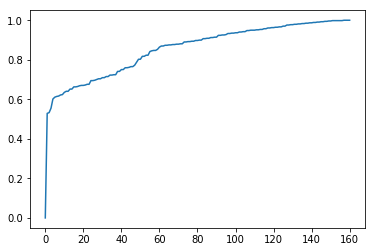

In [58]:
nb(GNB, spam_points_training, spam_points_test, spam_labels_training, spam_labels_test)


In [52]:
sms_spam_dataset = pd.read_csv("../datasets/smsspam.csv")
sms_spam_labels = (sms_spam_dataset["label"].values == 'spam').astype(int)
sms_spam_points = sms_spam_dataset.drop(['label'], axis=1).values.flatten()
sms_spam_points = (CountVectorizer().fit_transform(sms_spam_points) != 0).astype(int)

sms_spam_points_training, sms_spam_points_test, sms_spam_labels_training, sms_spam_labels_test = ml.train_test_split(sms_spam_points, sms_spam_labels, train_size=0.8)


In [61]:
class MNB:
    def __init__(self, data, labels):
        self.labels_variants = set(labels)
        self.bern_prob = np.array([np.asarray(np.mean(data[labels == label], axis=0))[0] for label in self.labels_variants])
        
    def _label_prob(self, label_index, point):
        point_prob = np.multiply(to_row(self.bern_prob[label_index]), point) + np.multiply((1 - to_row(self.bern_prob[label_index])), (1 - point))
        return np.sum(np.log(point_prob + 0.0000001))
        
    def _prob_point(self, point):
        probabilities = np.ones(len(self.labels_variants))
        exp_sum = 0
        for (index, label) in enumerate(self.labels_variants):
            label_prob = self._label_prob(index, point.toarray())
            probabilities[index] = label_prob
            exp_sum += np.exp(probabilities[index])
        return np.exp(probabilities) / exp_sum
        
    def prob(self, points):
        return np.array([self._prob_point(point) for point in points])
        
    def predict(self, points):
        return np.argmax(self.prob(points), axis=1)
    

Accuracy: 0.9901345291479821


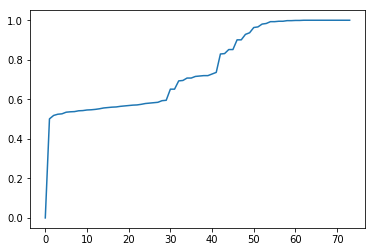

In [62]:
nb(MNB, sms_spam_points_training, sms_spam_points_test, sms_spam_labels_training, sms_spam_labels_test)

